# 4. RS CVn Stars Corner Plots

## 4.1. Notebook setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import emcee
import corner
import warnings
warnings.filterwarnings('ignore')

## 4.2. <a href="https://www.dropbox.com/sh/hkkdw1pdpt76kfb/AACVh44utUvSsedKgkMG8UeJa?dl=0">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── HR1099_chain.h5
│   ├── HR1099_lmfit_params.txt
│   ├── thermal-gs.mplstyle
│   ├── UXArietis_chain.h5
│   ├── UXArietis_lmfit_params.txt
│   ├── ...
├── figures
│   ├── HR1099_corner.pdf
│   ├── HR1099_corner.png
│   ├── UXArietis_corner.pdf
│   ├── UXArietis_corner.png
│   ├── ...
├── notebooks
│   ├── rs-cvn_corner-plots.ipynb
│   ├── ...
.
.
.

## 4.3. Load

In [2]:
HR_sampler = emcee.backends.HDFBackend('../data/HR1099_chain.h5')
HR_samples = HR_sampler.get_chain(flat=True)
HR_samples /= np.array([1, 1, 1, 1, np.pi/180])
HR_lmfit_params = np.loadtxt('../data/HR1099_lmfit_params.txt')
HR_lmfit_params /= np.array([1, 1, 1, 1, np.pi/180])

UX_sampler = emcee.backends.HDFBackend('../data/UXArietis_chain.h5')
UX_samples = UX_sampler.get_chain(flat=True)
UX_samples /= np.array([1, 1, 1, 1, np.pi/180])
UX_lmfit_params = np.loadtxt('../data/UXArietis_lmfit_params.txt')
UX_lmfit_params /= np.array([1, 1, 1, 1, np.pi/180])

plt.style.use('../data/thermal-gs.mplstyle')

## 4.4. Plot

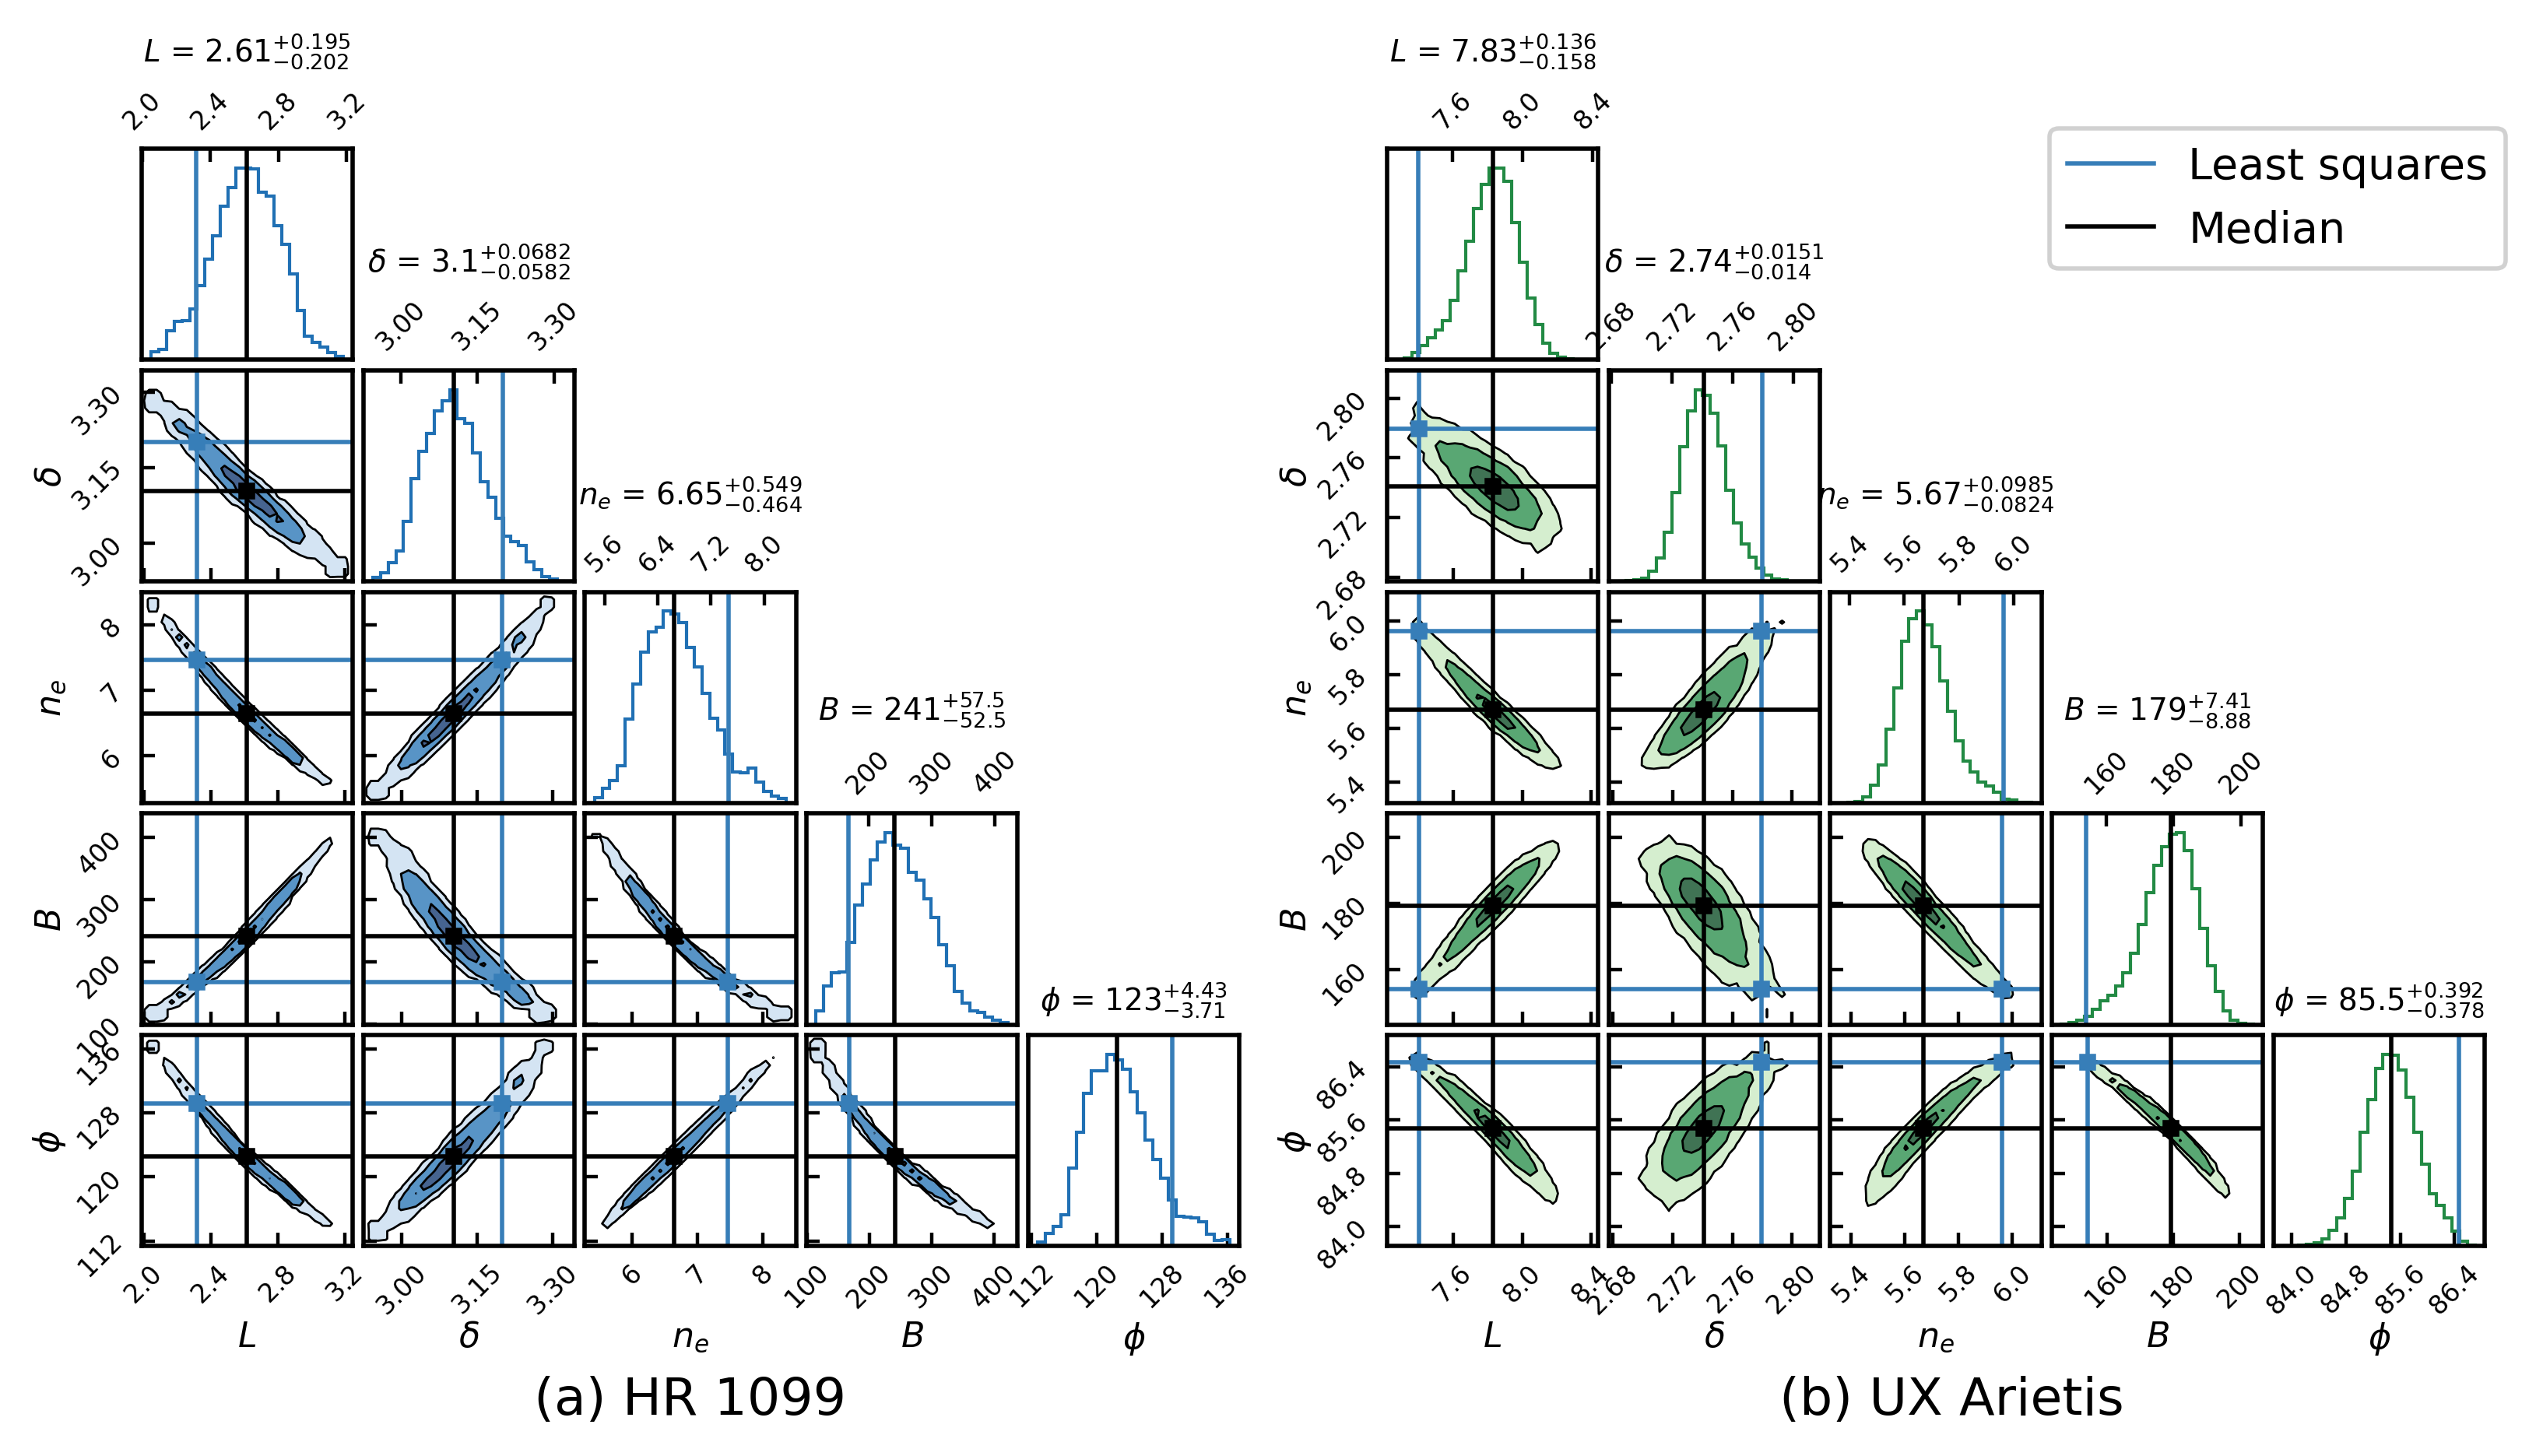

In [3]:
fig = plt.figure(figsize=(8, 4))
subfigs = fig.subfigures(1, 2, hspace=0, wspace=0)
plt_labels = ['$L$', '$\delta$', '$n_e$', '$B$', '$\phi$']

# HR 1099
thin = 10000
median_values = np.median(HR_samples[::thin, :], axis=0)
cmap = mpl.cm.get_cmap('Blues')
cmap.set_under(color='w')

cornerFig = corner.corner(HR_samples[::thin, :],color='black',top_ticks=True,quiet=True, show_titles=True,use_math_text=True,
labels=plt_labels,plot_datapoints=False, title_quantiles=[0.16, 0.5, 0.84], label_kwargs={"fontsize":8}, 
title_kwargs={"fontsize":7}, max_n_ticks=4, bins=25, title_fmt='3.3g', plot_density=False, fill_contours=True,
levels=(0.393, 0.865, 0.989), hist_kwargs={'linewidth':0.75, 'color':cmap(0.75)}, fig=subfigs[0], 
contour_kwargs={'linewidths':0.5, 'colors':'black'}, labelpad=0.05,
contourf_kwargs={'colors':(cmap(-1), cmap(0.25), cmap(0.75), cmap(0.999)), 'alpha':0.75})
corner.overplot_lines(cornerFig, HR_lmfit_params, color='C0', label='Least squares', lw=1)
corner.overplot_points(cornerFig, np.array([HR_lmfit_params]), color='C0', marker='s', ms=3)
corner.overplot_lines(cornerFig, median_values, color='black', label='Median', lw=1)
corner.overplot_points(cornerFig, np.array([median_values]), color='black', marker='s', ms=3)

for axis in cornerFig.axes:
    for side in ['top','bottom','left','right']:
        axis.spines[side].set_linewidth(1)
    axis.tick_params(axis='both', which='major', labelsize=6, length=3)

# UX Arietis
thin = 10
median_values = np.median(UX_samples[::thin, :], axis=0)
cmap = mpl.cm.get_cmap('Greens')
cmap.set_under(color='w')

cornerFig = corner.corner(UX_samples[::thin, :],color='black',top_ticks=True,quiet=True, show_titles=True,use_math_text=True,
labels=plt_labels,plot_datapoints=False, title_quantiles=[0.16, 0.5, 0.84], label_kwargs={"fontsize":8}, 
title_kwargs={"fontsize":7}, max_n_ticks=4, bins=25, title_fmt='3.3g', plot_density=False, fill_contours=True,
levels=(0.393, 0.865, 0.989), hist_kwargs={'linewidth':0.75, 'color':cmap(0.75)}, fig=subfigs[1], 
contour_kwargs={'linewidths':0.5, 'colors':'black'}, labelpad=0.05,
contourf_kwargs={'colors':(cmap(-1), cmap(0.25), cmap(0.75), cmap(0.999)), 'alpha':0.75})
corner.overplot_lines(cornerFig, UX_lmfit_params, color='C0', label='Least squares', lw=1)
corner.overplot_points(cornerFig, np.array([UX_lmfit_params]), color='C0', marker='s', ms=3)
corner.overplot_lines(cornerFig, median_values, color='black', label='Median', lw=1)
corner.overplot_points(cornerFig, np.array([median_values]), color='black', marker='s', ms=3)

for axis in cornerFig.axes:
    for side in ['top','bottom','left','right']:
        axis.spines[side].set_linewidth(1)
    axis.tick_params(axis='both', which='major', labelsize=6, length=3)

handles,labels = cornerFig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
cornerFig.legend(by_label.values(), by_label.keys(), fontsize=10, loc='upper right')
subfigs[0].text(0.40, -0.05, '(a) HR 1099', fontsize=12)
subfigs[1].text(0.40, -0.05, '(b) UX Arietis', fontsize=12)

cornerFig.set_facecolor('white')
plt.savefig('../figures/rs-cvn_corner-plots.png', bbox_inches='tight')
plt.savefig('../figures/rs-cvn_corner-plots.pdf', bbox_inches='tight')
plt.show()